# Titanic Survival Prediction by S.R.Sezhiyan

In [1]:
import pandas as pd

# Importing DataSet 

In [2]:
train_data = pd.read_csv(r"C:\Users\semmu\Downloads\titanic\train.csv")
test_data = pd.read_csv(r"C:\Users\semmu\Downloads\titanic\test.csv")

In [3]:
train_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_data.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Data Preprocessing

In [5]:
train_data.shape

(891, 12)

In [6]:
test_data.shape

(418, 11)

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [9]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [10]:
test_data.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,418.0,1100.500000,120.810458,892.00,996.2500,1100.5000,1204.75,1309.0000
Pclass,418.0,2.265550,0.841838,1.00,1.0000,3.0000,3.00,3.0000
Age,332.0,30.272590,14.181209,0.17,21.0000,27.0000,39.00,76.0000
SibSp,418.0,0.447368,0.896760,0.00,0.0000,0.0000,1.00,8.0000
Parch,418.0,0.392344,0.981429,0.00,0.0000,0.0000,0.00,9.0000
Fare,417.0,35.627188,55.907576,0.00,7.8958,14.4542,31.50,512.3292


# Handling Missing Values

In [11]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [13]:
train_data["Age"] = train_data["Age"].fillna(train_data["Age"].mean())
test_data["Age"] = test_data["Age"].fillna(test_data["Age"].mean())
train_data["Cabin"] = train_data["Cabin"].fillna(train_data["Cabin"].mode())
test_data["Cabin"] = test_data["Cabin"].fillna(test_data["Cabin"].mode())
train_data["Embarked"] = train_data["Embarked"].fillna("S")
test_data["Embarked"] = test_data["Embarked"].fillna("S")

In [14]:
train_data.shape

(891, 12)

In [15]:
teat = train_data[(train_data["Embarked"] == "NaN")]
train_data["Embarked"].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

# By Using Map Function Modifying The Feature Values

In [16]:
train_data['Embarked'] = train_data['Embarked'].map({'Q': 0,'S':1,'C':2}).astype(int)
test_data['Embarked'] = test_data['Embarked'].map({'Q': 0,'S':1,'C':2}).astype(int)
train_data['Sex'] = train_data['Sex'].map( {'female': 1,'male':0}).astype(int)
test_data['Sex'] = test_data['Sex'].map( {'female': 1,'male':0}).astype(int)

In [17]:
train_data["Age"] = train_data["Age"].astype(int)
test_data["Age"] = test_data["Age"].astype(int)
test_data["Fare"] = test_data["Fare"].fillna(test_data["Fare"].mean())
train_data["Fare"] = train_data["Fare"].astype(int)
test_data["Fare"] = test_data["Fare"].astype(int)

In [18]:
train_data.drop(columns=["PassengerId","Name","Ticket","Cabin"],inplace=True)
test_data.drop(columns=["PassengerId","Name","Ticket","Cabin"],inplace=True)

# Feature Selection

C:\python\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<AxesSubplot:>

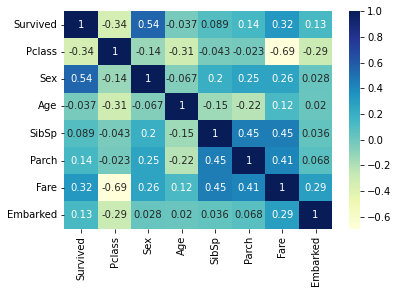

In [19]:
import seaborn as sns
sns.heatmap(train_data.corr(method="spearman"), cmap="YlGnBu", annot=True)

<AxesSubplot:>

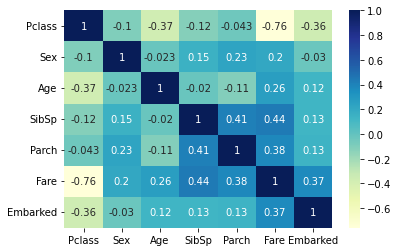

In [20]:
sns.heatmap(test_data.corr(method="spearman"), cmap="YlGnBu", annot=True)

# EDA - Exploratory Data Analysis

<AxesSubplot:xlabel='Age', ylabel='Count'>

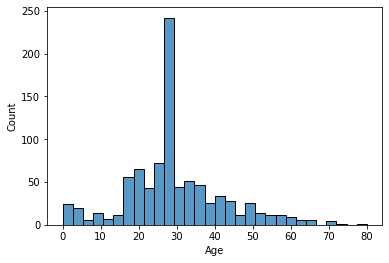

In [21]:
sns.histplot(data=train_data["Age"])

<AxesSubplot:xlabel='Fare', ylabel='Count'>

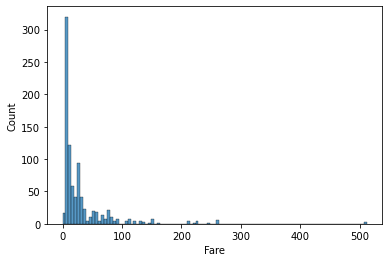

In [22]:
sns.histplot(data=train_data["Fare"])

<AxesSubplot:xlabel='Survived', ylabel='count'>

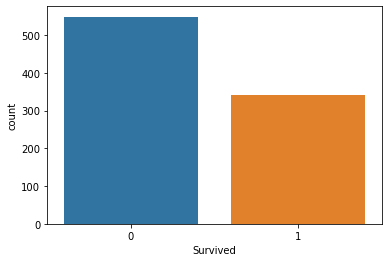

In [23]:
sns.countplot(x = "Survived",data=train_data)

<AxesSubplot:xlabel='Survived', ylabel='count'>

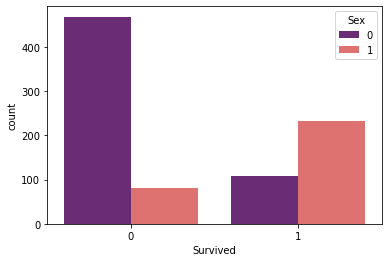

In [24]:
sns.countplot(x="Survived",hue="Sex",data=train_data,palette="magma")

<AxesSubplot:xlabel='Survived', ylabel='count'>

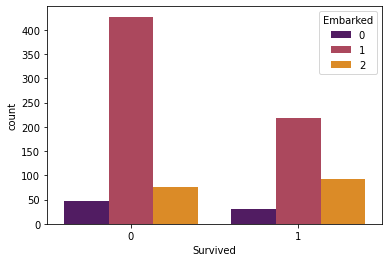

In [25]:
sns.countplot(x="Survived",hue="Embarked",data=train_data,palette="inferno")

<AxesSubplot:xlabel='Survived', ylabel='count'>

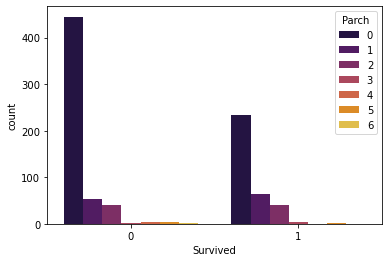

In [26]:
sns.countplot(x="Survived",hue="Parch",data=train_data,palette="inferno")

<AxesSubplot:xlabel='Survived', ylabel='count'>

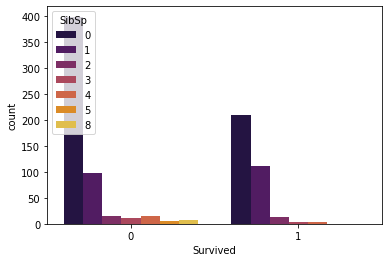

In [27]:
sns.countplot(x="Survived",hue="SibSp",data=train_data,palette="inferno")

<AxesSubplot:>

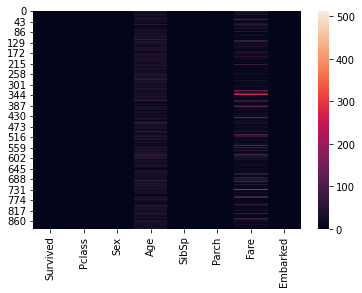

In [28]:
sns.heatmap(data=train_data)

# Select Appropriate Features Using Feature Pair Plots

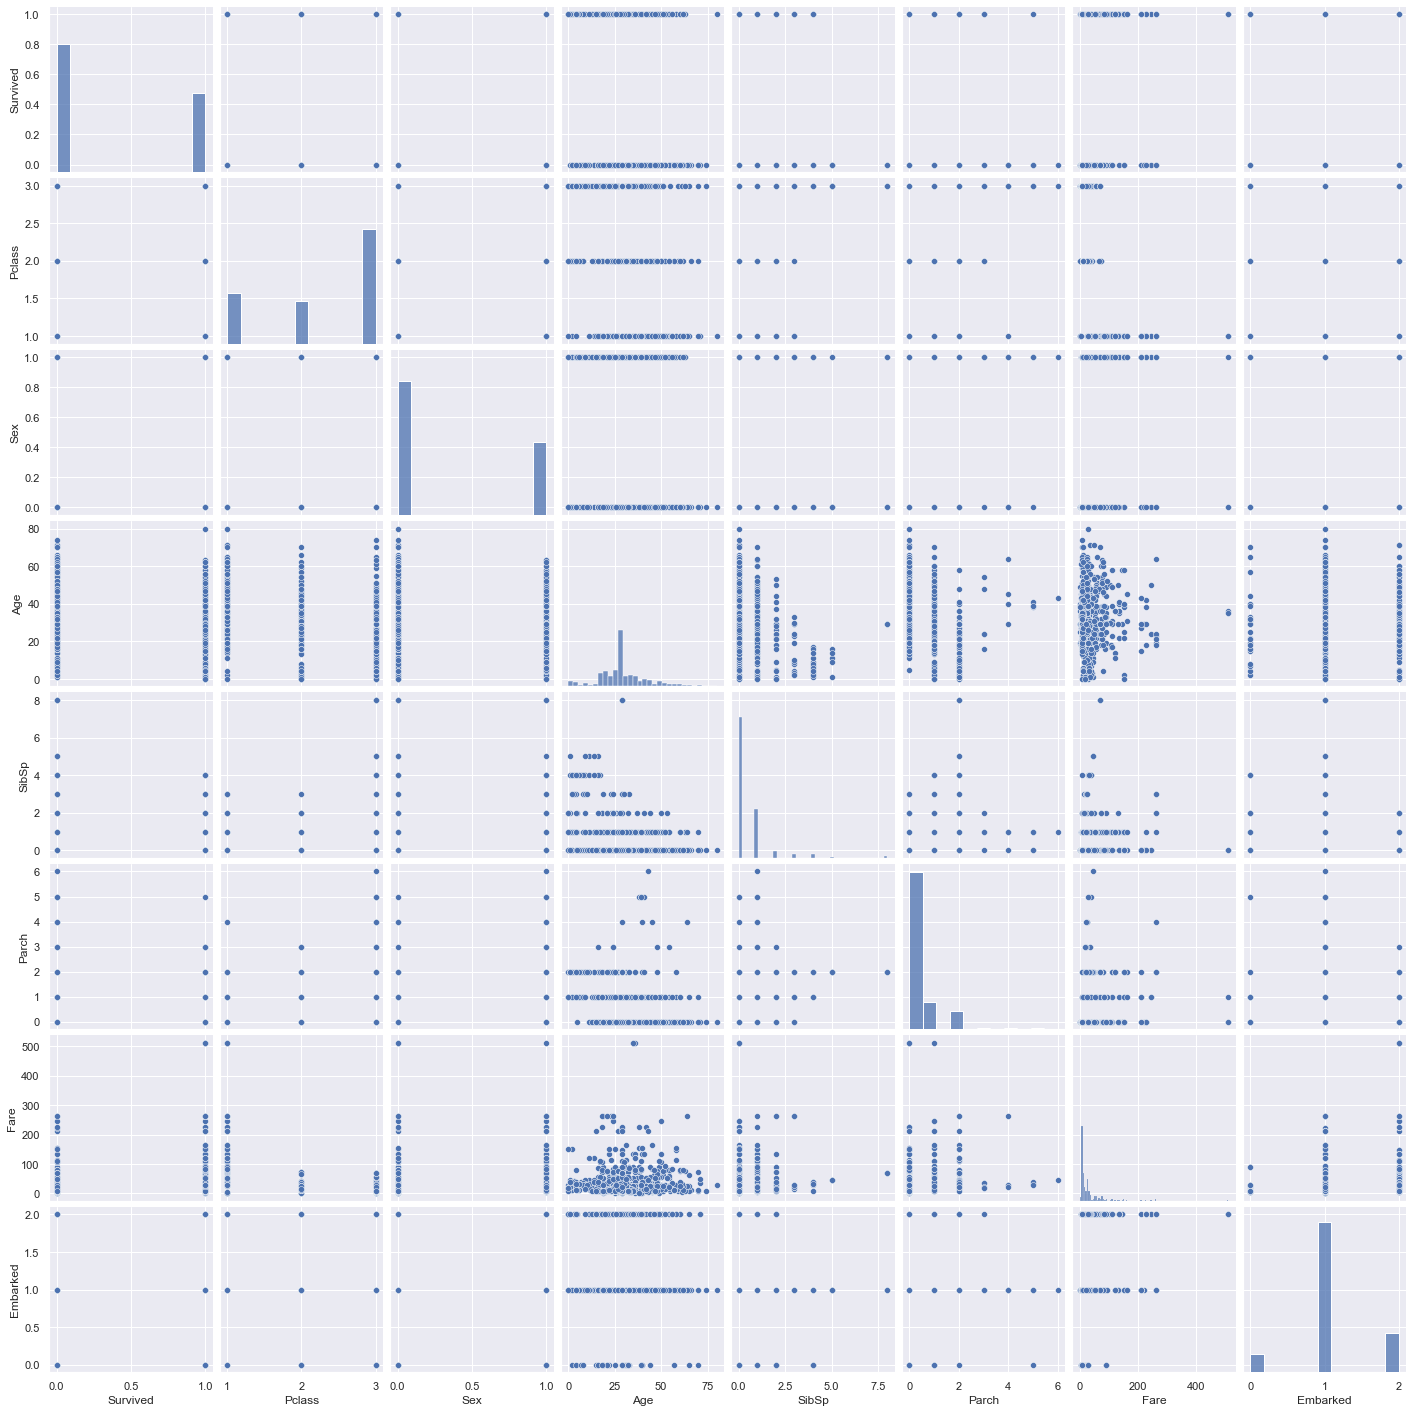

In [29]:
sns.set_theme(palette='deep')
sns.pairplot(data=train_data)

# Spliting the Data For Train-Test Split And Feature Scaling Using Standard Scaler

In [30]:
x = train_data.drop(["Survived"],axis=1)
y = train_data.iloc[:,0]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.7,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

# Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
lr = model.fit(x_train,y_train)
y_pred = lr.predict(x_test)

In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       157
           1       0.82      0.68      0.75       111

    accuracy                           0.81       268
   macro avg       0.81      0.79      0.79       268
weighted avg       0.81      0.81      0.80       268



In [33]:
y_act = lr.predict(x_train)
print(classification_report(y_train, y_act))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       392
           1       0.75      0.68      0.71       231

    accuracy                           0.80       623
   macro avg       0.79      0.77      0.78       623
weighted avg       0.80      0.80      0.80       623



# Logistic Regression Model Evalution Using Confusion Matrix And Classification Report

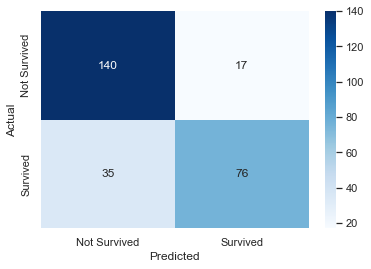

In [34]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Gaussian Naive-Byes 

In [35]:
from sklearn.naive_bayes import GaussianNB
model_1 = GaussianNB()
gb = model_1.fit(x_train,y_train)
y_pred_1 = gb.predict(x_test)

In [36]:
print(classification_report(y_test, y_pred_1))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       157
           1       0.77      0.72      0.74       111

    accuracy                           0.79       268
   macro avg       0.79      0.78      0.79       268
weighted avg       0.79      0.79      0.79       268



In [37]:
y_act_1 = gb.predict(x_train)
print(classification_report(y_train, y_act_1))

              precision    recall  f1-score   support

           0       0.83      0.84      0.84       392
           1       0.72      0.71      0.72       231

    accuracy                           0.79       623
   macro avg       0.78      0.77      0.78       623
weighted avg       0.79      0.79      0.79       623



# Gaussian Naive-Bayes Model Evalution Using Confusion Matrix And Classification Report

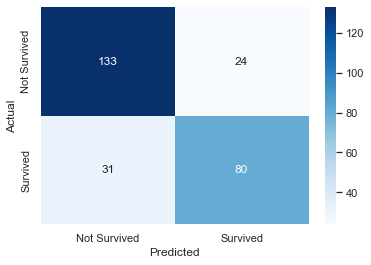

In [38]:
cm = confusion_matrix(y_test, y_pred_1)

sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Decision Tree Classifier

In [39]:
from sklearn.tree import DecisionTreeClassifier
model_2 = DecisionTreeClassifier()
dt = model_2.fit(x_train,y_train)
y_pred_2 = dt.predict(x_test)

In [40]:
print(classification_report(y_test,y_pred_2))

              precision    recall  f1-score   support

           0       0.75      0.83      0.79       157
           1       0.71      0.60      0.65       111

    accuracy                           0.74       268
   macro avg       0.73      0.72      0.72       268
weighted avg       0.73      0.74      0.73       268



In [41]:
y_act_2 = dt.predict(x_train)
print(classification_report(y_train,y_act_2))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97       392
           1       0.99      0.90      0.94       231

    accuracy                           0.96       623
   macro avg       0.97      0.95      0.96       623
weighted avg       0.96      0.96      0.96       623



# Decision Tree Classifier Model Evalution Using Confusion Matrix And Classification Report

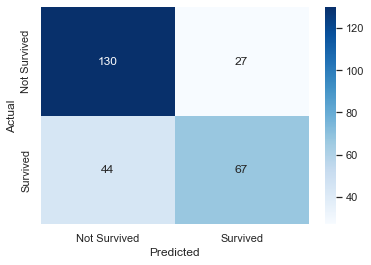

In [42]:
cm = confusion_matrix(y_test, y_pred_2)

sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Random Forest Classifier with Grid Search Cv For Hyper Parameter Tuning

In [43]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [44]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(x_test,y_test)
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Best Accuracy: 0.8249475890985327


In [45]:
grid_search.fit(x_train,y_train)
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Best Accuracy: 0.8217935483870968


In [46]:
y_pred_3 = grid_search.predict(x_test)
print(classification_report(y_test,y_pred_3))

              precision    recall  f1-score   support

           0       0.78      0.93      0.85       157
           1       0.87      0.64      0.74       111

    accuracy                           0.81       268
   macro avg       0.83      0.78      0.79       268
weighted avg       0.82      0.81      0.80       268



In [47]:
y_act_3 = grid_search.predict(x_train)
print(classification_report(y_train,y_act_3))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90       392
           1       0.90      0.73      0.81       231

    accuracy                           0.87       623
   macro avg       0.88      0.84      0.85       623
weighted avg       0.87      0.87      0.87       623



# Random Forest Classifier Model Evalution Using Confusion Matrix And Classification Report

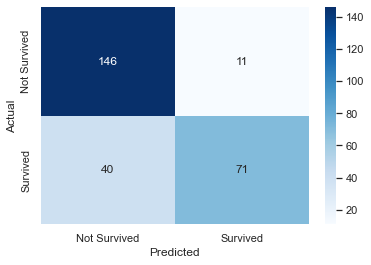

In [48]:
cm = confusion_matrix(y_test, y_pred_3)

sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Adaptive Booster Classifier With Grid Search Cv For Hyper Parameter Tuning

In [49]:
param_grid_1 = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.1, 0.5, 1.0]
}

In [50]:
from sklearn.ensemble import AdaBoostClassifier
adb = AdaBoostClassifier()
grid_search_1 = GridSearchCV(estimator=adb, param_grid=param_grid_1, cv=5, n_jobs=-1)
grid_search_1.fit(x_train,y_train)
print("Best Parameters:", grid_search_1.best_params_)
print("Best Accuracy:", grid_search_1.best_score_)

Best Parameters: {'learning_rate': 0.1, 'n_estimators': 150}
Best Accuracy: 0.8073935483870969


In [51]:
y_pred_4 = grid_search_1.predict(x_test)
print(classification_report(y_test,y_pred_4))

              precision    recall  f1-score   support

           0       0.77      0.92      0.83       157
           1       0.84      0.60      0.70       111

    accuracy                           0.79       268
   macro avg       0.80      0.76      0.77       268
weighted avg       0.80      0.79      0.78       268



In [52]:
y_act_4 = grid_search_1.predict(x_train)
print(classification_report(y_train,y_act_4))

              precision    recall  f1-score   support

           0       0.85      0.88      0.86       392
           1       0.78      0.73      0.75       231

    accuracy                           0.82       623
   macro avg       0.81      0.80      0.81       623
weighted avg       0.82      0.82      0.82       623



# Adaptive Booster Clssifier Model Evalution Using Confusion Matrix And Classification Report

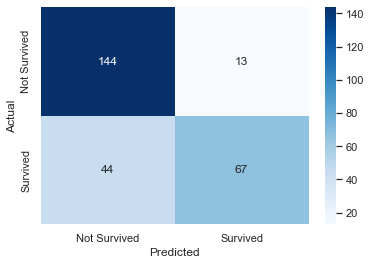

In [53]:
cm = confusion_matrix(y_test, y_pred_4)

sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Stacking Classifier with Gradient Boosting

In [54]:
from sklearn.ensemble import StackingClassifier,GradientBoostingClassifier
base_models = [
    ('rf', RandomForestClassifier(random_state=42)),
    ('gb', GradientBoostingClassifier(random_state=42))]

meta_model = LogisticRegression()

st =StackingClassifier(estimators=base_models,final_estimator=meta_model,n_jobs=-1,cv=5)

param_grid_2 = {
    'final_estimator__C': [0.1, 1.0, 10.0],}
grid_search_2 = GridSearchCV(st,param_grid=param_grid_2,cv=5,n_jobs=-1)
grid_search_2.fit(x_train,y_train)
print("Best Parameters:", grid_search_2.best_params_)
print("Best Accuracy:", grid_search_2.best_score_)

Best Parameters: {'final_estimator__C': 0.1}
Best Accuracy: 0.8090064516129033


In [55]:
y_pred_5 = grid_search_2.predict(x_test)
print(classification_report(y_test,y_pred_5))

              precision    recall  f1-score   support

           0       0.76      0.94      0.84       157
           1       0.88      0.57      0.69       111

    accuracy                           0.79       268
   macro avg       0.82      0.76      0.76       268
weighted avg       0.80      0.79      0.78       268



In [56]:
y_act_5 = grid_search_2.predict(x_train)
print(classification_report(y_train,y_act_5))

              precision    recall  f1-score   support

           0       0.90      0.99      0.95       392
           1       0.98      0.82      0.89       231

    accuracy                           0.93       623
   macro avg       0.94      0.91      0.92       623
weighted avg       0.93      0.93      0.93       623



# Stacking Classifier with Gradient Boosting Model Evalution Using Confusion Matrix And Classification Report

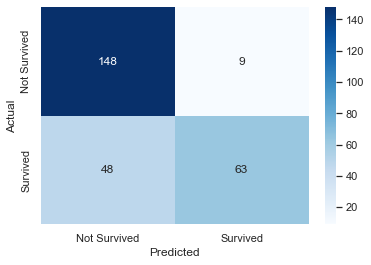

In [57]:
cm = confusion_matrix(y_test, y_pred_5)

sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Implenting Our Best Model to our Test Dataset For Future Prediction

In [58]:
df_test = pd.read_csv(r"C:\Users\semmu\Downloads\titanic\test.csv")

In [59]:
df_test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [60]:
df_test.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [61]:
df_test['Age'] = df_test['Age'].fillna(df_test['Age'].mean())

In [62]:
df_test['Fare'].fillna(df_test['Fare'].mean(), inplace=True)

In [63]:
df_test['Embarked'] = df_test['Embarked'].map({'Q': 0,'S':1,'C':2}).astype(int)
df_test['Sex'] = df_test['Sex'].map( {'female': 1,'male':0}).astype(int)

In [64]:
df_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,34.50000,0,0,7.8292,0
1,3,1,47.00000,1,0,7.0000,1
2,2,0,62.00000,0,0,9.6875,0
3,3,0,27.00000,0,0,8.6625,1
4,3,1,22.00000,1,1,12.2875,1
...,...,...,...,...,...,...,...
413,3,0,30.27259,0,0,8.0500,1
414,1,1,39.00000,0,0,108.9000,2
415,3,0,38.50000,0,0,7.2500,1
416,3,0,30.27259,0,0,8.0500,1


In [65]:
df_test_scaled = scaler.fit_transform(df_test)

In [66]:
pred = grid_search.predict(df_test_scaled)

In [67]:
df_test2 = pd.read_csv(r"C:\Users\semmu\Downloads\titanic\test.csv")

In [68]:
output = pd.DataFrame({'PassengerId': df_test2['PassengerId'],
                        'Survived' : pred})

# Predicting The Unseen Test Data Using Our Well Trained And Best Model

In [69]:
output

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
